In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('./ml_files/titanic_train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
# EDA

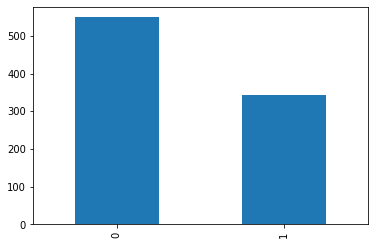

In [54]:
df.Survived.value_counts().plot(kind='bar')

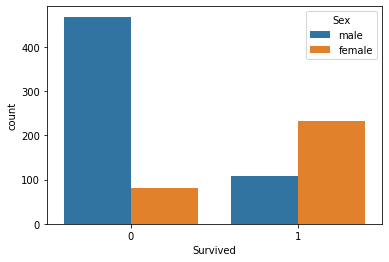

In [55]:
sns.countplot(df['Survived'], hue='Sex', data=df)

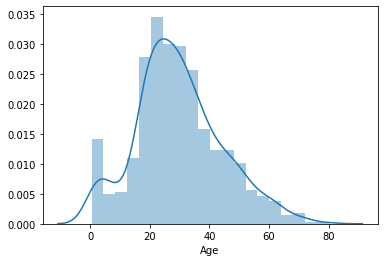

In [56]:
sns.distplot(df['Age'])

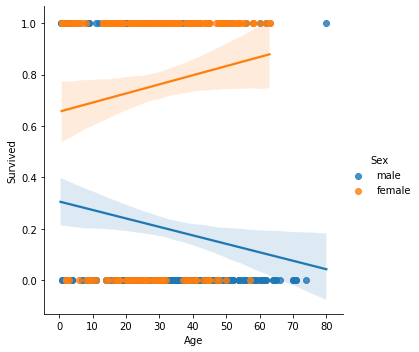

In [57]:
sns.lmplot(x='Age', y='Survived', data=df, hue='Sex')

In [58]:
# preprocessing

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
df.drop('Cabin', axis=1, inplace=True)

In [61]:
# Age의 null값은 pclass의 평균 나이로 채우..

In [62]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [63]:
age_list = []
for i in zip(df['Pclass'], df['Age']):
    pc = i[0]
    age = i[1]
    
    if pd.isnull(age):
        if pc == '1':
            age_list.append(38)
        elif pd == '2':
            age_list.append(29)
        else:
            age_list.append(25)
    else:
        age_list.append(age)

age_list

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 25,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 25,
 31.0,
 25,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 25,
 19.0,
 25,
 25,
 40.0,
 25,
 25,
 66.0,
 28.0,
 42.0,
 25,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 25,
 3.0,
 19.0,
 25,
 25,
 25,
 25,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 25,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 25,
 25,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 25,
 25,
 0.83,
 30.0,
 22.0,
 29.0,
 25,
 28.0,
 17.0,
 33.0,
 16.0,
 25,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 25,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 25,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 25,
 38.0,
 25,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 2.0,
 21.0,
 25,
 32.5,
 32.5,
 54.0,
 12.0,
 25,
 24.0,
 25,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 25,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,
 36.5,
 42.0,
 51.0,
 22.0,
 55.

In [64]:
df['Age'] = age_list
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [65]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [66]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [67]:
# x, y divide

In [68]:
y = df['Survived']
x = df.drop(['Survived','PassengerId','Name','Ticket', 'Fare'], axis=1)

In [70]:
y[:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [72]:
x[:10]

Pclass     Sex   Age  SibSp  Parch Embarked
0       3    male  22.0      1      0        S
1       1  female  38.0      1      0        C
2       3  female  26.0      0      0        S
3       1  female  35.0      1      0        S
4       3    male  35.0      0      0        S
5       3    male  25.0      0      0        Q
6       1    male  54.0      0      0        S
7       3    male   2.0      3      1        S
8       3  female  27.0      0      2        S
9       2  female  14.0      1      0        C

In [73]:
y.shape

(889,)

In [74]:
x.shape

(889, 6)

In [75]:
x = pd.get_dummies(x)

In [76]:
x

Pclass   Age  SibSp  Parch  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         3  22.0      1      0           0         1           0           0   
1         1  38.0      1      0           1         0           1           0   
2         3  26.0      0      0           1         0           0           0   
3         1  35.0      1      0           1         0           0           0   
4         3  35.0      0      0           0         1           0           0   
..      ...   ...    ...    ...         ...       ...         ...         ...   
886       2  27.0      0      0           0         1           0           0   
887       1  19.0      0      0           1         0           0           0   
888       3  25.0      1      2           1         0           0           0   
889       1  26.0      0      0           0         1           1           0   
890       3  32.0      0      0           0         1           0           1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1  
..          ...  
886           1  
887           1  
888           1  
889           0  
890           0  

[889 rows x 9 columns]

In [33]:
# train data, test data

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log = LogisticRegression()

In [42]:
log.fit(x_train, y_train)

C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
predictions = log.predict(x_test)
predictions[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       167
           1       0.77      0.80      0.78       100

    accuracy                           0.84       267
   macro avg       0.82      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267

